In [1]:
from textwrap import dedent 
from other import convert_string_to_cells
from map import Map
from highLevelSearch import PBS, PP, update_plan_for_agent, GPBS
from lowLevelSearch import astar_timesteps, sipp, manhattan_distance, SearchTreePQD
from draw import draw
from my_read import read_map_from_file, read_tasks_from_file
from test import test
from test_paths_corr import check_paths
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # tasks = read_tasks_from_file('../scens/scen-even-128-2/maze-128-128-2-even-1.scen')
# # tasks = read_tasks_from_file('../scens/scen-even-room-64-8/room-64-64-8-even-1.scen')
# tasks = read_tasks_from_file('../scens/random-32-32-20-even-1.scen')

# starts = tasks[-10:, [0, 1]].astype(int).tolist()
# goals = tasks[-10:, [2, 3]].astype(int).tolist()

# starts = [tuple(start) for start in starts]
# goals = [tuple(goal) for goal in goals]

# cells = read_map_from_file(path='../maps/random-32-32-20.map')
# # cells = read_map_from_file(path='../maps/room-64-64-8.map')
# # cells = read_map_from_file(path='../maps/maze-128-128-2.map')
# task_map = Map(cells)

In [3]:
# def get_map_data():
#         map_str = dedent(
#             """
#             . . . # # . . . . . . . . # # . . . # . . # # . . . . . . .  
#             . . . # # # # # . . # . . # # . . . . . . # # . . . . . . . 
#             . . . . . . . # . . # . . # # . . . # . . # # . . . . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # # . . . . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # # . . . . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # # # # # . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # # # # # . . . . 
#             . . . . . . . # . . # . . # # . . . # . . # . . . . . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
#             . . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
#             . . . # # . . . . . # . . . . . . . # . . . . . . . . . . . 
#             . . . # # # # # # # # # # # # # . # # . # # # # # # # . # # 
#             . . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
#             . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
#             . . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
#         """
#         )
#         cells = convert_string_to_cells(map_str)
#         return Map(cells)

# task_map = get_map_data()

# starts = [(1, 28), (2, 29), (3, 20), (0, 0)]
# goals = [(0, 1), (6, 2), (5, 6), (4, 23)]

Paths found


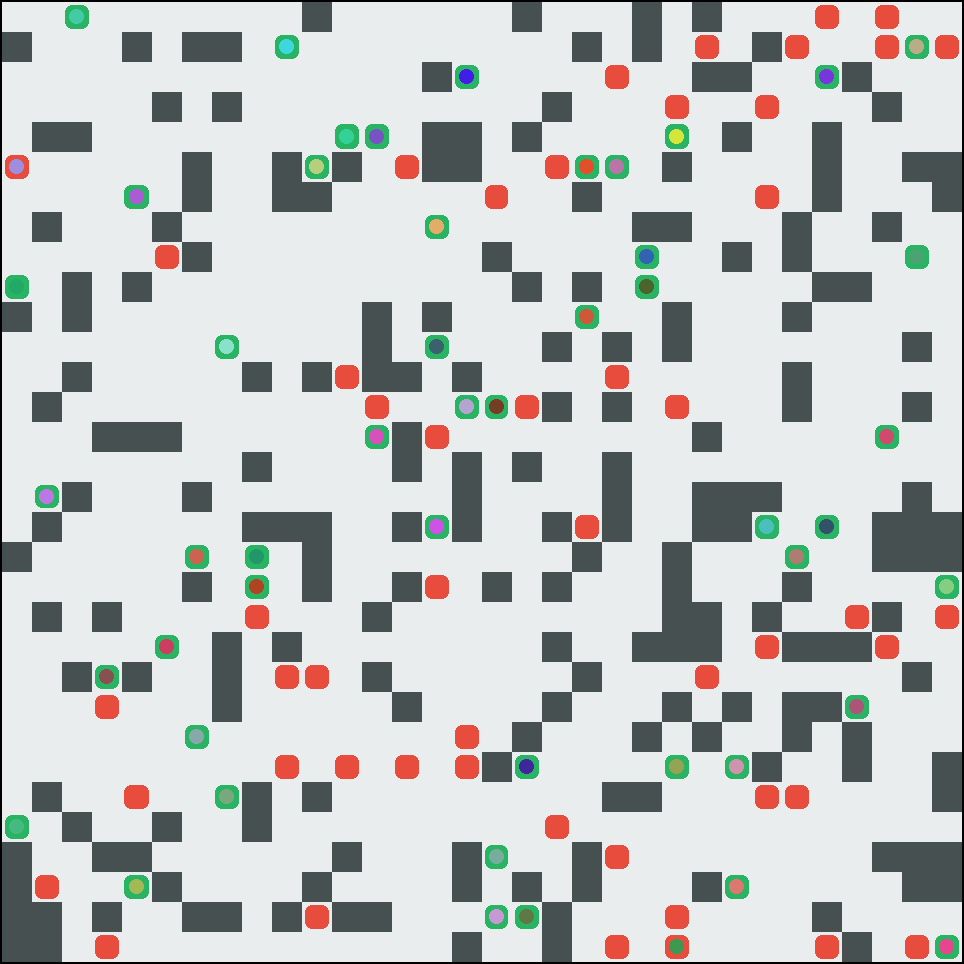

In [71]:
tasks = read_tasks_from_file('../scens/scen-even-32/random-32-32-20-even-1.scen')

starts = tasks[:50, [0, 1]].astype(int).tolist()
goals = tasks[:50, [2, 3]].astype(int).tolist()

cells = read_map_from_file(path='../maps/random-32-32-20.map')
task_map = Map(cells)

paths = GPBS(
    starts,
    goals,
    task_map,
    # astar_timesteps,
    sipp,
    np.inf,
    manhattan_distance,
    SearchTreePQD
)
print("Paths found")
draw(
    grid_map=task_map,
    starts=starts,
    goals=goals,
    paths=paths,
    output_filename="animated_trajectories",
)

In [25]:
def get_map_data():
        map_str = dedent(
            """
            . . . . # # # # . . . . # # # 
            . # . . . . . # . . . . . . # 
            . # . . . . . # . . . . . . # 
            . # . . . . . # # # # . . . . 
            . . . . . . . . . . . . . . . 
        """
        )
        cells = convert_string_to_cells(map_str)
        return Map(cells)

In [5]:
map_path = '../scens/scen-even-room-64-8/room-64-64-8-even'

scen_path = '../maps/room-64-64-8.map'

min_agent_cnt = 20

max_agent_cnt = 70

agent_step = 5

scen_num = 8

time_threshold = 10

random_64_agent_num = list(range(min_agent_cnt, max_agent_cnt, agent_step))

In [6]:
stats_for_random_64_1_PBS = test(PBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [15:26<00:00, 92.63s/it] 


In [7]:
stats_for_random_64_1_PP = test(PP, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt ,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [04:36<00:00, 27.68s/it]


In [8]:
stats_for_random_64_1_GPBS = test(GPBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt ,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 10/10 [05:41<00:00, 34.12s/it]


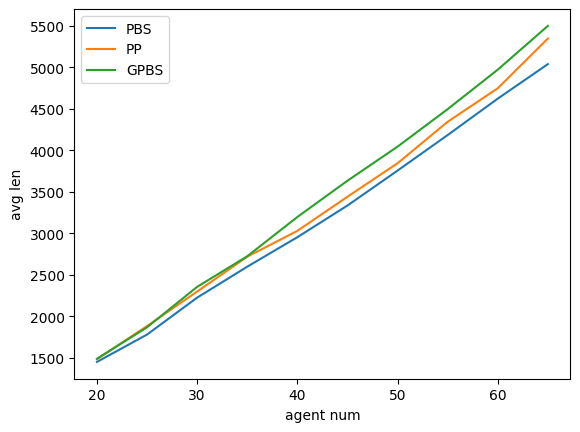

In [9]:



plt.plot(random_64_agent_num, stats_for_random_64_1_PBS['len'], label='PBS')
plt.plot(random_64_agent_num, stats_for_random_64_1_PP['len'], label='PP')
plt.plot(random_64_agent_num, stats_for_random_64_1_GPBS['len'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

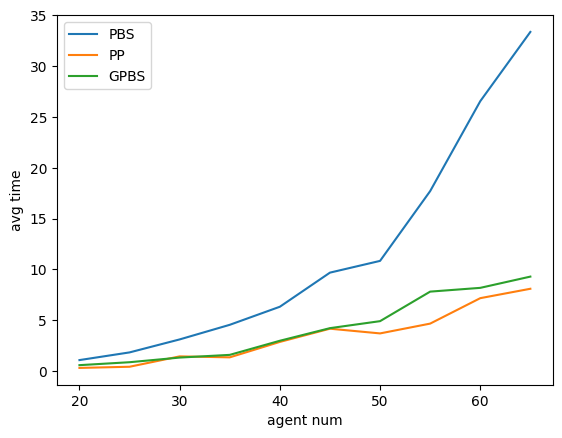

In [10]:
import matplotlib.pyplot as plt


plt.plot(random_64_agent_num, stats_for_random_64_1_PBS['time'], label='PBS')
plt.plot(random_64_agent_num, stats_for_random_64_1_PP['time'], label='PP')
plt.plot(random_64_agent_num, stats_for_random_64_1_GPBS['time'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg time")


plt.legend()

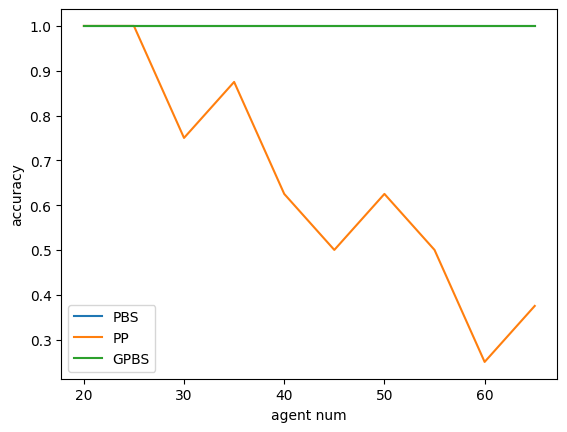

In [11]:
import matplotlib.pyplot as plt


plt.plot(random_64_agent_num, stats_for_random_64_1_PBS['corr'], label='PBS')
plt.plot(random_64_agent_num, stats_for_random_64_1_PP['corr'], label='PP')
plt.plot(random_64_agent_num, stats_for_random_64_1_GPBS['corr'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("accuracy")


plt.legend()

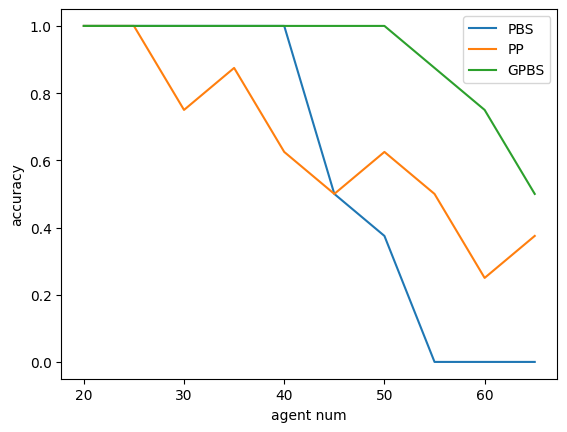

In [12]:
import matplotlib.pyplot as plt


plt.plot(random_64_agent_num, stats_for_random_64_1_PBS['corr_w_time_threshold'], label='PBS')
plt.plot(random_64_agent_num, stats_for_random_64_1_PP['corr_w_time_threshold'], label='PP')
plt.plot(random_64_agent_num, stats_for_random_64_1_GPBS['corr_w_time_threshold'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("accuracy")


plt.legend()

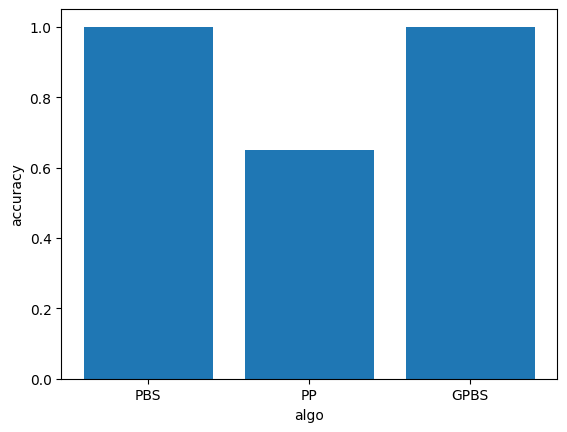

In [13]:
plt.bar(['PBS', 'PP', 'GPBS'], [sum(stats_for_random_64_1_PBS['corr']) / len(stats_for_random_64_1_PBS['corr']),
                        sum(stats_for_random_64_1_PP['corr']) / len(stats_for_random_64_1_PP['corr']),
                        sum(stats_for_random_64_1_GPBS['corr']) / len(stats_for_random_64_1_GPBS['corr'])])

plt.xlabel("algo")
plt.ylabel("accuracy")

plt.show()

maze-128-128-10

In [56]:
map_path = '../scens/scen-even-64/random-64-64-20-even'

scen_path = '../maps/random-64-64-20.map'

min_agent_cnt = 20

max_agent_cnt = 100

agent_step = 10

scen_num = 8

time_threshold = 10

maze_128_agent_num = list(range(min_agent_cnt, max_agent_cnt, agent_step))

In [57]:
stats_for_maze_128_2_PBS = test(PBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 8/8 [05:08<00:00, 38.61s/it]


In [58]:
stats_for_maze_128_2_PP = test(PP, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 8/8 [01:35<00:00, 11.94s/it]


In [59]:
stats_for_maze_128_2_GPBS = test(GPBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 8/8 [02:23<00:00, 17.98s/it]


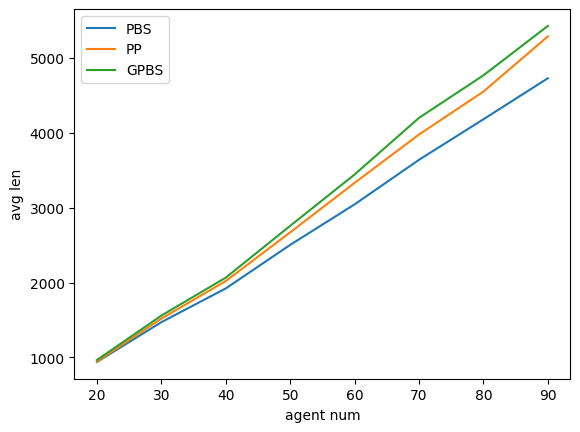

In [60]:
import matplotlib.pyplot as plt



plt.plot(maze_128_agent_num, stats_for_maze_128_2_PBS['len'], label='PBS')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_PP['len'], label='PP')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_GPBS['len'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

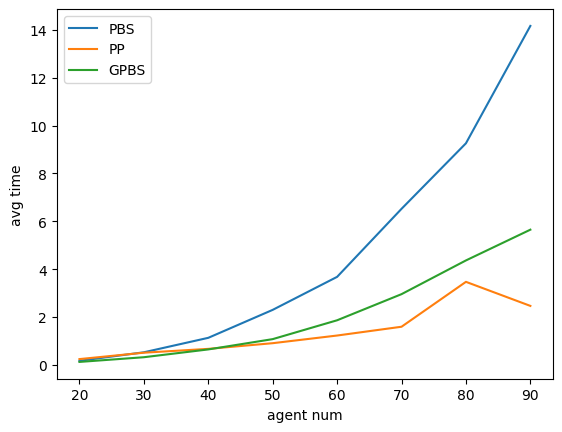

In [61]:
import matplotlib.pyplot as plt



plt.plot(maze_128_agent_num, stats_for_maze_128_2_PBS['time'], label='PBS')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_PP['time'], label='PP')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_GPBS['time'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg time")


plt.legend()

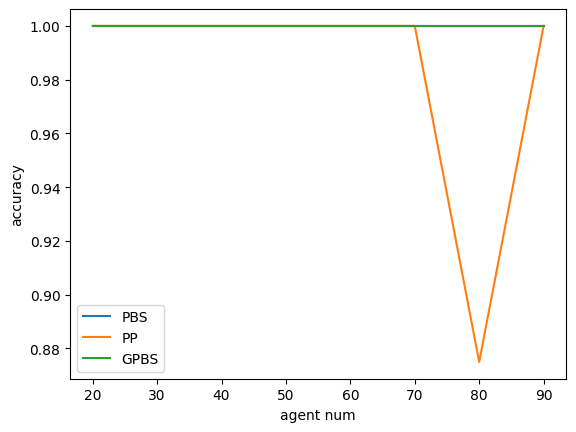

In [62]:
import matplotlib.pyplot as plt


plt.plot(maze_128_agent_num, stats_for_maze_128_2_PBS['corr'], label='PBS')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_PP['corr'], label='PP')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_GPBS['corr'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("accuracy")


plt.legend()

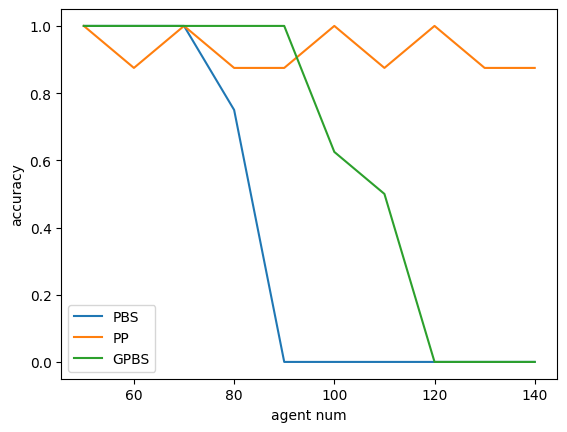

In [20]:
import matplotlib.pyplot as plt


plt.plot(maze_128_agent_num, stats_for_maze_128_2_PBS['corr_w_time_threshold'], label='PBS')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_PP['corr_w_time_threshold'], label='PP')
plt.plot(maze_128_agent_num, stats_for_maze_128_2_GPBS['corr_w_time_threshold'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("accuracy")


plt.legend()

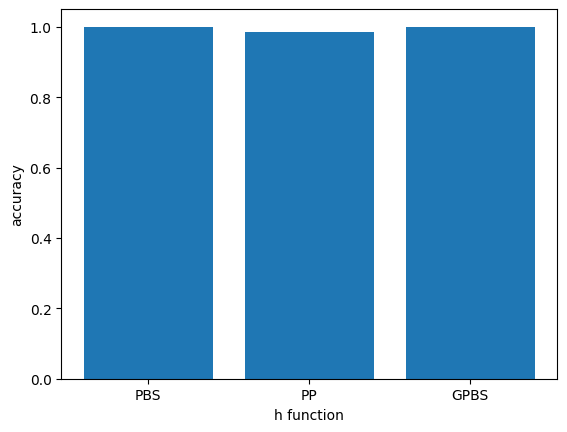

In [63]:
plt.bar(['PBS', 'PP', 'GPBS'], [sum(stats_for_maze_128_2_PBS['corr']) / len(stats_for_maze_128_2_PBS['corr']),
                        sum(stats_for_maze_128_2_PP['corr']) / len(stats_for_maze_128_2_PP['corr']),
                        sum(stats_for_maze_128_2_GPBS['corr']) / len(stats_for_maze_128_2_GPBS['corr'])])

plt.xlabel("h function")
plt.ylabel("accuracy")

plt.show()

warehouse

In [45]:
map_path = '../scens/scen-even-warehouse/warehouse-10-20-10-2-2-even'

scen_path = '../maps/warehouse-10-20-10-2-2.map'

min_agent_cnt = 50

max_agent_cnt = 140

agent_step = 10

scen_num = 8

time_threshold = 10

warehouse_agent_num = list(range(min_agent_cnt, max_agent_cnt, agent_step))

In [46]:
stats_for_warehouse_PBS = test(PBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 9/9 [33:25<00:00, 222.78s/it]


In [47]:
stats_for_warehouse_GPBS = test(GPBS, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 9/9 [15:40<00:00, 104.53s/it]


In [48]:
stats_for_warehouse_PP = test(PP, 
            map_path, 
            scen_path,
            min_agent_cnt,
            max_agent_cnt,
            agent_step,
            scen_num,
            time_threshold,
            sipp,
            np.inf,
            manhattan_distance,
            SearchTreePQD
            )

100%|██████████| 9/9 [09:42<00:00, 64.75s/it]


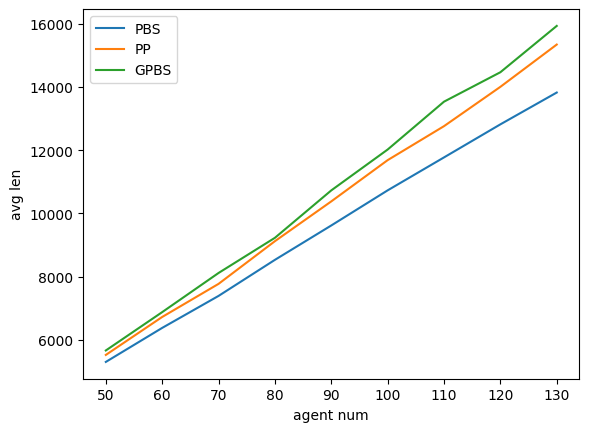

In [49]:
import matplotlib.pyplot as plt



plt.plot(warehouse_agent_num, stats_for_warehouse_PBS['len'], label='PBS')
plt.plot(warehouse_agent_num, stats_for_warehouse_PP['len'], label='PP')
plt.plot(warehouse_agent_num, stats_for_warehouse_GPBS['len'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

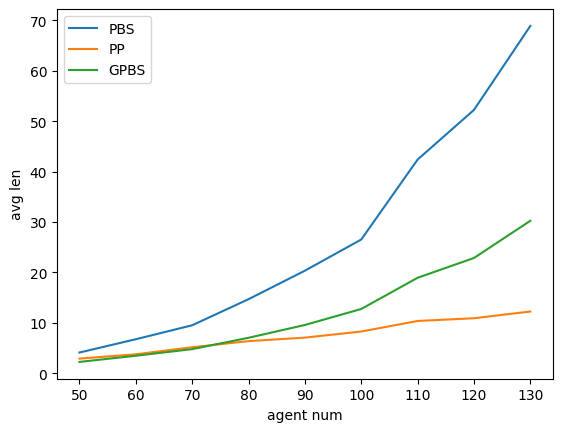

In [50]:
import matplotlib.pyplot as plt



plt.plot(warehouse_agent_num, stats_for_warehouse_PBS['time'], label='PBS')
plt.plot(warehouse_agent_num, stats_for_warehouse_PP['time'], label='PP')
plt.plot(warehouse_agent_num, stats_for_warehouse_GPBS['time'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

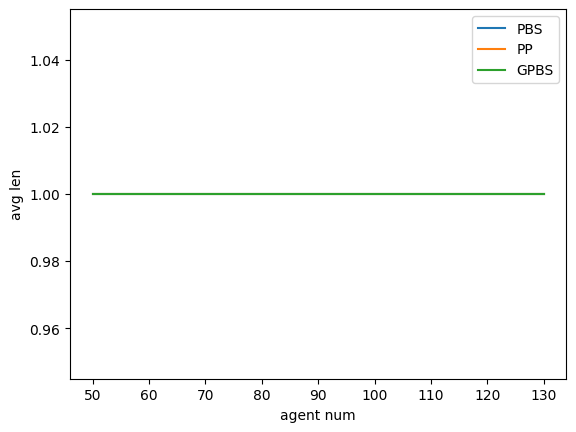

In [51]:
import matplotlib.pyplot as plt



plt.plot(warehouse_agent_num, stats_for_warehouse_PBS['corr'], label='PBS')
plt.plot(warehouse_agent_num, stats_for_warehouse_PP['corr'], label='PP')
plt.plot(warehouse_agent_num, stats_for_warehouse_GPBS['corr'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

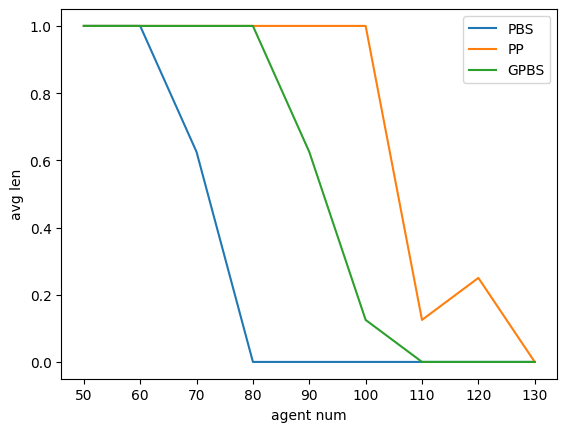

In [52]:
import matplotlib.pyplot as plt



plt.plot(warehouse_agent_num, stats_for_warehouse_PBS['corr_w_time_threshold'], label='PBS')
plt.plot(warehouse_agent_num, stats_for_warehouse_PP['corr_w_time_threshold'], label='PP')
plt.plot(warehouse_agent_num, stats_for_warehouse_GPBS['corr_w_time_threshold'], label='GPBS')


plt.xlabel("agent num")
plt.ylabel("avg len")


plt.legend()

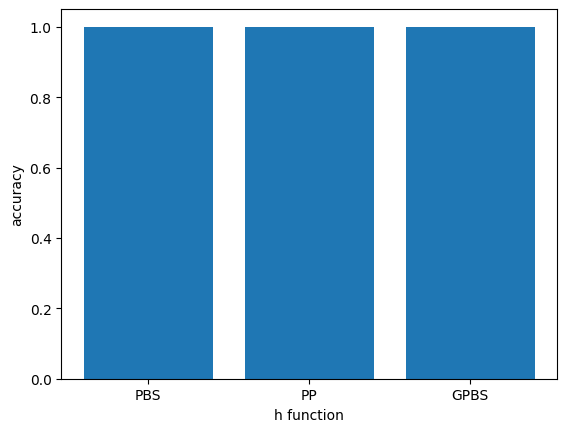

In [53]:
plt.bar(['PBS', 'PP', 'GPBS'], [sum(stats_for_warehouse_PBS['corr']) / len(stats_for_warehouse_PBS['corr']),
                        sum(stats_for_warehouse_PP['corr']) / len(stats_for_warehouse_PP['corr']),
                        sum(stats_for_warehouse_GPBS['corr']) / len(stats_for_warehouse_GPBS['corr'])])

plt.xlabel("h function")
plt.ylabel("accuracy")

plt.show()